## Assignment 1 Submission

Name: Thapakorn PIPATPAJONG

Student ID: 1011844514

### Q1

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

#### Answer:

Denote $P$ as the set of students who pass the class and $Q$ as the set of students who answer this question quickly. Now, we want to find $\mathbb{P}(P|Q)$.

It is given that 
\begin{align*}
    \mathbb{P}(P) = 0.9, \\
    \mathbb{P}(Q|P) = 0.6, \\
    \text{and} \ \mathbb{P}(Q|P') = 0.3
\end{align*}

Therefore, using Bayes' Theorem, we can obtain the answer.
\begin{align*}
    \mathbb{P}(P|Q) &= \frac{\mathbb{P}(Q|P)\mathbb{P}(P)}{\mathbb{P}(Q)} \\
                    &= \frac{\mathbb{P}(Q|P)\mathbb{P}(P)}{\mathbb{P}(Q|P)\mathbb{P}(P) + \mathbb{P}(Q|P')\mathbb{P}(P')} \\
                    &= \frac{\mathbb{P}(Q|P)\mathbb{P}(P)}{\mathbb{P}(Q|P)\mathbb{P}(P) + \mathbb{P}(Q|P')(1 - \mathbb{P}(P))} \\
                    &= \frac{(0.6)(0.9)}{(0.6)(0.9) + (0.3)(0.1)} \\
                    &= \frac{18}{19}
\end{align*}

### Q2

Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

#### Answer:

Suppose there are k categories, The p.m.f. of multinomial distribution is 
\begin{align*}
    p(x|\theta, n)  &= \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1}\ldots\theta_k^{x_k} \\ 
                    &= c_1 \theta_1^{x_1}\ldots\theta_k^{x_k} &\text{(Ignoring constants)}
\end{align*}
where $x_1 + \ldots + x_k = n$.

and for Dirichlet distribution
\begin{align*}
    p(\theta|\boldsymbol{\alpha})   &= \frac{1}{B(\boldsymbol{\alpha})}\prod_{i=1}^{k} \theta_i^{\alpha_i-1} \\
                                    &= c_2 \prod_{i=1}^{k} \theta_i^{\alpha_i-1} &\text{(Again, ignoring constants)}
\end{align*}
for $\boldsymbol{\alpha} = (\alpha_1, \ldots, \alpha_k)$.

Therefore the posterior of $\theta$ is
\begin{align*}
    p(\theta|x,n,\boldsymbol{\alpha})   &= \frac{p(x|\theta)p(\theta)}{p(x)} &\text{(Bayes' Theorem)} \\
                                        &= \frac{c_1c_2}{p(x)}\left(\theta_1^{x_1}\ldots\theta_k^{x_k}\right)\left(\prod_{i=1}^{k} \theta_i^{\alpha_i-1}\right) \\
                                        &= c_3 \prod_{i=1}^{k} \theta_i^{x_i + \alpha_i - 1} &\text{(Simplifying constant)}
\end{align*}

Observe that the p.d.f. of the posterior distribution has the form similar to Dirichlet distribution. Therefore, the posterior distribution follows Dirichlet distribution with $k$ categories, and the parameter $\boldsymbol{\alpha} = (x_1 + \alpha_1, \ldots, x_k + \alpha_k)$.

### Q3

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

#### Answer:

In [1]:
"""First, we import the python libraries needed for this question"""
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

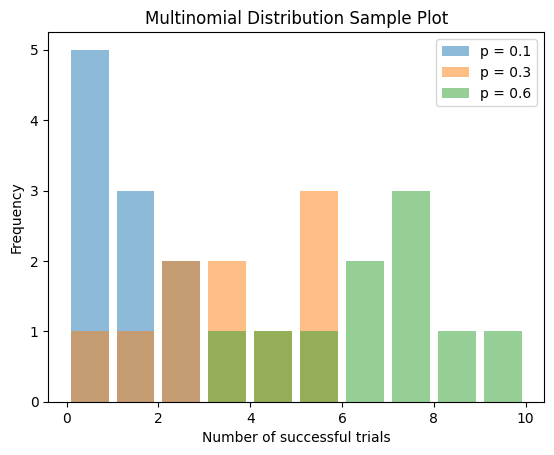

In [2]:
"""Visualizing 3 categories multinomial distribution, in this case we set p1 = 0.1, p2 = 0.3, p3 = 0.6"""
n = 10
p = [0.1, 0.3, 0.6]
SAMPLE_SIZE = 10
sample = stats.multinomial(n = n, p = p).rvs(size = SAMPLE_SIZE)
bins = [x for x in range(11)]

plt.title("Multinomial Distribution Sample Plot")
plt.xlabel("Number of successful trials")
plt.ylabel("Frequency")
plt.hist(sample[:, 0], bins, rwidth = 0.825, alpha = 0.5, label = "p = 0.1")
plt.hist(sample[:, 1], bins, rwidth = 0.825, alpha = 0.5, label = "p = 0.3")
plt.hist(sample[:, 2], bins, rwidth = 0.825, alpha = 0.5, label = "p = 0.6")
plt.legend(loc = "upper right")
plt.show()

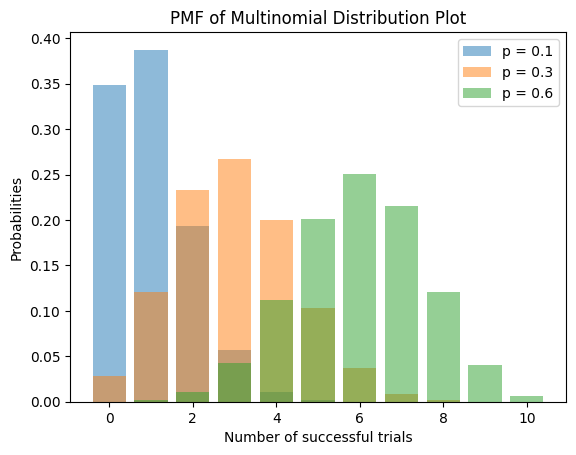

In [3]:
"""The plot for an actual distribution"""
# generate all possible values
prob_category = []
for idx in range(len(p)):
    p_vec = p.copy()
    tmp = p_vec[0]
    p_vec[0] = p_vec[idx]
    p_vec[idx] = tmp
    pr = []
    for i in range(11):
        prob = 0
        for j in range(11-i):
            k = 10 - i - j
            x = [i, j, k]
            prob += stats.multinomial.pmf(x, n = n, p = p_vec)
        pr.append(prob)
    prob_category.append(pr)
        
plt.title("PMF of Multinomial Distribution Plot")
plt.xlabel("Number of successful trials")
plt.ylabel("Probabilities")
plt.bar(bins, prob_category[0], alpha = 0.5, label = "p = 0.1")
plt.bar(bins, prob_category[1], alpha = 0.5, label = "p = 0.3")
plt.bar(bins, prob_category[2], alpha = 0.5, label = "p = 0.6")
plt.legend(loc = "upper right")
plt.show()

In [4]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np

# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

"""Suppose the prior follows dirichlet distribution with alpha = (1.5, 1.5, 1.5)"""
alpha_prior = np.array([1.5, 1.5, 1.5])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)


fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)

fig

In [6]:
"""
    Then, the posterior distribution is also dirichlet distribution with alpha = (1.5 + x1, 1.5 + x2, 1.5 + x3), as derived in Q2
    Note that the sample variable generated when we want to plot multinomial distribution sample. 
"""
alpha_post = np.array([1.5 + sum(sample[:, 0]), 1.5 + sum(sample[:, 1]), 1.5 + sum(sample[:, 2])])  # Posterior alpha values
dirichlet_post = stats.dirichlet(alpha=alpha_post)

fig = ff.create_ternary_contour(p.T, dirichlet_post.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)

fig